In [1]:
%load_ext autoreload
%autoreload 2

# 04_clean_pmt_history.py

In [13]:
%%writefile test_clean_pmt_history.py
'''
Tests for clean_pmt_history.py which contains functions used in 04_clean_pmt_history.py
'''
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from lendingclub.csv_preparation import clean_pmt_history as cph


def test_detect_strange_pmt_hist():
    test_cases = [
        pd.DataFrame({
            'RECEIVED_D': {
                15049: 'APR2014'
            },
            'PERIOD_END_LSTAT': {
                15049: 'Current'
            },
            'MONTH': {
                15049: 'MAR2014'
            },
            'IssuedDate': {
                15049: 'FEB2014'
            },
            'State': {
                15049: 'VA'
            },
            'HomeOwnership': {
                15049: 'MORTGAGE'
            },
            'EarliestCREDITLine': {
                15049: 'OCT1994'
            },
            'EmploymentLength': {
                15049: '10+ years'
            },
            'grade': {
                15049: 'E'
            },
            'APPL_FICO_BAND': {
                15049: '675-679'
            },
            'Last_FICO_BAND': {
                15049: '700-704'
            },
            'VINTAGE': {
                15049: '14Q1'
            },
            'LOAN_ID': {
                15049: 12287070
            },
            'PBAL_BEG_PERIOD': {
                15049: 27600.0
            },
            'PRNCP_PAID': {
                15049: 267.510009765625
            },
            'INT_PAID': {
                15049: 471.2699890136719
            },
            'FEE_PAID': {
                15049: 0.0
            },
            'DUE_AMT': {
                15049: 738.780029296875
            },
            'RECEIVED_AMT': {
                15049: 738.780029296875
            },
            'PBAL_END_PERIOD': {
                15049: 27332.490234375
            },
            'MOB': {
                15049: 1
            },
            'CO': {
                15049: 0
            },
            'COAMT': {
                15049: 0.0
            },
            'InterestRate': {
                15049: 0.05999999865889549
            },
            'MONTHLYCONTRACTAMT': {
                15049: 614.2999877929688
            },
            'dti': {
                15049: 22.079999923706055
            },
            'MonthlyIncome': {
                15049: 6250.0
            },
            'OpenCREDITLines': {
                15049: 17.0
            },
            'TotalCREDITLines': {
                15049: 47.0
            },
            'RevolvingCREDITBalance': {
                15049: 23483
            },
            'RevolvingLineUtilization': {
                15049: 0.6909999847412109
            },
            'Inquiries6M': {
                15049: 3.0
            },
            'DQ2yrs': {
                15049: 0.0
            },
            'MonthsSinceDQ': {
                15049: np.nan
            },
            'PublicRec': {
                15049: 0.0
            },
            'MonthsSinceLastRec': {
                15049: np.nan
            },
            'currentpolicy': {
                15049: 1
            },
            'term': {
                15049: 60
            },
            'PCO_RECOVERY': {
                15049: np.nan
            },
            'PCO_COLLECTION_FEE': {
                15049: np.nan
            }
        }),
        pd.DataFrame({
            'RECEIVED_D': {
                0: 'SEP2007'
            },
            'PERIOD_END_LSTAT': {
                0: 'Current'
            },
            'MONTH': {
                0: 'SEP2007'
            },
            'IssuedDate': {
                0: 'AUG2007'
            },
            'State': {
                0: 'FL'
            },
            'HomeOwnership': {
                0: 'RENT'
            },
            'EarliestCREDITLine': {
                0: 'MAY2005'
            },
            'EmploymentLength': {
                0: '1 year'
            },
            'grade': {
                0: 'G'
            },
            'APPL_FICO_BAND': {
                0: '640-644'
            },
            'Last_FICO_BAND': {
                0: '640-644'
            },
            'VINTAGE': {
                0: '07Q3'
            },
            'LOAN_ID': {
                0: 114469
            },
            'PBAL_BEG_PERIOD': {
                0: 13000.0
            },
            'PRNCP_PAID': {
                0: 278.3390808105469
            },
            'INT_PAID': {
                0: 186.60092163085938
            },
            'FEE_PAID': {
                0: 0.0
            },
            'DUE_AMT': {
                0: 464.95001220703125
            },
            'RECEIVED_AMT': {
                0: 464.94000244140625
            },
            'PBAL_END_PERIOD': {
                0: 12721.6611328125
            },
            'MOB': {
                0: 1
            },
            'CO': {
                0: 0
            },
            'COAMT': {
                0: 0.0
            },
            'InterestRate': {
                0: 0.17219999432563782
            },
            'MONTHLYCONTRACTAMT': {
                0: 464.95001220703125
            },
            'dti': {
                0: 15.979999542236328
            },
            'MonthlyIncome': {
                0: 2666.666748046875
            },
            'OpenCREDITLines': {
                0: 6.0
            },
            'TotalCREDITLines': {
                0: 7.0
            },
            'RevolvingCREDITBalance': {
                0: 6703
            },
            'RevolvingLineUtilization': {
                0: 0.7979999780654907
            },
            'Inquiries6M': {
                0: 1.0
            },
            'DQ2yrs': {
                0: 0.0
            },
            'MonthsSinceDQ': {
                0: 0.0
            },
            'PublicRec': {
                0: 0.0
            },
            'MonthsSinceLastRec': {
                0: 0.0
            },
            'currentpolicy': {
                0: 0
            },
            'term': {
                0: 36
            },
            'PCO_RECOVERY': {
                0: np.nan
            },
            'PCO_COLLECTION_FEE': {
                0: np.nan
            }
        })
    ]
    assert cph.detect_strange_pmt_hist(test_cases[0])
    assert not cph.detect_strange_pmt_hist(test_cases[1])


def test_pmt_hist_fmt_date():
    test_cases = [
        pd.DataFrame({
            'pmt_date': {
                0: 'SEP2007'
            },
            'status_period_end': {
                0: 'Current'
            },
            'date': {
                0: 'SEP2007'
            },
            'issue_d': {
                0: 'AUG2007'
            },
            'addr_state': {
                0: 'FL'
            },
            'home_ownership': {
                0: 'RENT'
            },
            'first_credit_line': {
                0: 'MAY2005'
            },
            'emp_len': {
                0: '1 year'
            },
            'grade': {
                0: 'G'
            },
            'fico_apply': {
                0: '640-644'
            },
            'fico_last': {
                0: '640-644'
            },
            'vintage': {
                0: '07Q3'
            },
            'loan_id': {
                0: 114469
            },
            'outs_princp_beg': {
                0: 13000.0
            },
            'princp_paid': {
                0: 278.3389892578125
            },
            'int_paid': {
                0: 186.6009979248047
            },
            'fee_paid': {
                0: 0.0
            },
            'amt_due': {
                0: 464.95001220703125
            },
            'amt_paid': {
                0: 464.94000244140625
            },
            'outs_princp_end': {
                0: 12721.6611328125
            },
            'm_on_books': {
                0: 1
            },
            'charged_off_this_month': {
                0: 0
            },
            'charged_off_amt': {
                0: 0.0
            },
            'int_rate': {
                0: 0.1720000058412552
            },
            'monthly_pmt': {
                0: 464.95001220703125
            },
            'dti': {
                0: 15.979999542236328
            },
            'm_income': {
                0: 2666.6669921875
            },
            'open_credit_lines': {
                0: 6.0
            },
            'total_credit_lines': {
                0: 7.0
            },
            'revol_credit_bal': {
                0: 6703
            },
            'revol_line_util': {
                0: 0.7979999780654907
            },
            'inq_6m': {
                0: 1.0
            },
            'dq_24m': {
                0: 0.0
            },
            'm_since_dq': {
                0: 0.0
            },
            'public_recs': {
                0: 0.0
            },
            'm_since_rec': {
                0: 0.0
            },
            'current_policy': {
                0: 0
            },
            'term': {
                0: 36
            },
            'recovs': {
                0: np.nan
            },
            'recov_fees': {
                0: np.nan
            },
            'calc_amt_paid': {
                0: 464.94000244140625
            }
        })
    ]
    test_col = 'date'
    cph.pmt_hist_fmt_date(test_cases[0], test_col)
    assert ptypes.is_datetime64_any_dtype(test_cases[0][test_col])


def test_merge_dupe_dates():
    test_cases = [(pd.DataFrame({
        'pmt_date': {
            7060: pd.NaT,
            7061: pd.NaT
        },
        'status_period_end': {
            7060: 'defaulted',
            7061: 'charged_off'
        },
        'date': {
            7060: pd.Timestamp('2014-07-01 00:00:00'),
            7061: pd.Timestamp('2014-07-01 00:00:00')
        },
        'issue_d': {
            7060: pd.Timestamp('2013-03-01 00:00:00'),
            7061: pd.Timestamp('2013-03-01 00:00:00')
        },
        'addr_state': {
            7060: 'FL',
            7061: 'FL'
        },
        'home_ownership': {
            7060: 'mortgage',
            7061: 'mortgage'
        },
        'first_credit_line': {
            7060: pd.Timestamp('1999-09-01 00:00:00'),
            7061: pd.Timestamp('1999-09-01 00:00:00')
        },
        'emp_len': {
            7060: '< 1 year',
            7061: '< 1 year'
        },
        'grade': {
            7060: 'B',
            7061: 'B'
        },
        'vintage': {
            7060: '13Q1',
            7061: '13Q1'
        },
        'outs_princp_beg': {
            7060: 5649.046875,
            7061: 2000
        },
        'princp_paid': {
            7060: 5,
            7061: 0.0
        },
        'int_paid': {
            7060: 5,
            7061: 0.0
        },
        'fee_paid': {
            7060: 5,
            7061: 0.0
        },
        'amt_due': {
            7060: 1031.9599609375,
            7061: 1286.199951171875
        },
        'amt_paid': {
            7060: 15,
            7061: 0.0
        },
        'outs_princp_end': {
            7060: 5649.046875,
            7061: 5649.046875
        },
        'm_on_books': {
            7060: 15,
            7061: 16
        },
        'charged_off_this_month': {
            7060: 0,
            7061: 1
        },
        'charged_off_amt': {
            7060: 10,
            7061: 20
        },
        'int_rate': {
            7060: 0.11100000143051147,
            7061: 0.11100000143051147
        },
        'monthly_pmt': {
            7060: 254.24000549316406,
            7061: 254.24000549316406
        },
        'dti': {
            7060: 32.36000061035156,
            7061: 32.36000061035156
        },
        'm_income': {
            7060: 6066.666015625,
            7061: 6066.666015625
        },
        'open_credit_lines': {
            7060: 13.0,
            7061: 13.0
        },
        'total_credit_lines': {
            7060: 51.0,
            7061: 51.0
        },
        'revol_line_util': {
            7060: 0.6439999938011169,
            7061: 0.6439999938011169
        },
        'inq_6m': {
            7060: 3.0,
            7061: 3.0
        },
        'dq_24m': {
            7060: 0.0,
            7061: 0.0
        },
        'm_since_dq': {
            7060: 55.0,
            7061: 55.0
        },
        'public_recs': {
            7060: 0.0,
            7061: 0.0
        },
        'm_since_rec': {
            7060: np.nan,
            7061: np.nan
        },
        'current_policy': {
            7060: 1,
            7061: 1
        },
        'term': {
            7060: 36,
            7061: 36
        },
        'recovs': {
            7060: 20,
            7061: 30
        },
        'recov_fees': {
            7060: 15,
            7061: 25
        },
        'all_cash_to_inv': {
            7060: 100,
            7061: 200
        },
        'fico_apply': {
            7060: 712,
            7061: 712
        },
        'fico_last': {
            7060: 587,
            7061: 582
        },
        'loan_id': {
            7060: 3626698,
            7061: 3626698
        },
        'revol_credit_bal': {
            7060: 31549.0,
            7061: 31549.0
        }
    }), {
        'pmt_date': 0,
        'status_period_end': 1,
        'date': 2,
        'issue_d': 3,
        'addr_state': 4,
        'home_ownership': 5,
        'first_credit_line': 6,
        'emp_len': 7,
        'grade': 8,
        'vintage': 9,
        'outs_princp_beg': 10,
        'princp_paid': 11,
        'int_paid': 12,
        'fee_paid': 13,
        'amt_due': 14,
        'amt_paid': 15,
        'outs_princp_end': 16,
        'm_on_books': 17,
        'charged_off_this_month': 18,
        'charged_off_amt': 19,
        'int_rate': 20,
        'monthly_pmt': 21,
        'dti': 22,
        'm_income': 23,
        'open_credit_lines': 24,
        'total_credit_lines': 25,
        'revol_line_util': 26,
        'inq_6m': 27,
        'dq_24m': 28,
        'm_since_dq': 29,
        'public_recs': 30,
        'm_since_rec': 31,
        'current_policy': 32,
        'term': 33,
        'recovs': 34,
        'recov_fees': 35,
        'all_cash_to_inv': 36,
        'fico_apply': 37,
        'fico_last': 38,
        'loan_id': 39,
        'revol_credit_bal': 40
    })]
    ex = cph.merge_dupe_dates(*test_cases[0])
    assert ex.shape[0] == 1
    assert ex['outs_princp_beg'].iloc[0] == 5649.046875
    assert ex['princp_paid'].iloc[0] == 5
    assert ex['int_paid'].iloc[0] == 5
    assert ex['fee_paid'].iloc[0] == 5
    assert ex['amt_paid'].iloc[0] == 15
    assert ex['charged_off_this_month'].iloc[0] == 1
    assert ex['charged_off_amt'].iloc[0] == 30
    assert ex['recovs'].iloc[0] == 50
    assert ex['recov_fees'].iloc[0] == 40
    assert ex['all_cash_to_inv'].iloc[0] == 300
    
def test_insert_missing_dates():
    test_cases = [
        (pd.DataFrame(
            {'pmt_date': {7059: pd.NaT, 7061: pd.NaT},
             'status_period_end': {7059: 'late_120', 7061: 'charged_off'},
             'date': {7059: pd.Timestamp('2014-05-01 00:00:00'),
              7061: pd.Timestamp('2014-07-01 00:00:00')},
             'issue_d': {7059: pd.Timestamp('2013-03-01 00:00:00'),
              7061: pd.Timestamp('2013-03-01 00:00:00')},
             'addr_state': {7059: 'FL', 7061: 'FL'},
             'home_ownership': {7059: 'mortgage', 7061: 'mortgage'},
             'first_credit_line': {7059: pd.Timestamp('1999-09-01 00:00:00'),
              7061: pd.Timestamp('1999-09-01 00:00:00')},
             'emp_len': {7059: '< 1 year', 7061: '< 1 year'},
             'grade': {7059: 'B', 7061: 'B'},
             'vintage': {7059: '13Q1', 7061: '13Q1'},
             'outs_princp_beg': {7059: 5649.046875, 7061: 5649.046875},
             'princp_paid': {7059: 0.0, 7061: 0.0},
             'int_paid': {7059: 0.0, 7061: 0.0},
             'fee_paid': {7059: 0.0, 7061: 0.0},
             'amt_due': {7059: 777.719970703125, 7061: 1286.199951171875},
             'amt_paid': {7059: 0.0, 7061: 0.0},
             'outs_princp_end': {7059: 5649.046875, 7061: 5649.046875},
             'm_on_books': {7059: 14, 7061: 16},
             'charged_off_this_month': {7059: 0.0, 7061: 1.0},
             'charged_off_amt': {7059: 0.0, 7061: 5649.046875},
             'int_rate': {7059: 0.11100000143051147, 7061: 0.11100000143051147},
             'monthly_pmt': {7059: 254.24000549316406, 7061: 254.24000549316406},
             'dti': {7059: 32.36000061035156, 7061: 32.36000061035156},
             'm_income': {7059: 6066.666015625, 7061: 6066.666015625},
             'open_credit_lines': {7059: 13.0, 7061: 13.0},
             'total_credit_lines': {7059: 51.0, 7061: 51.0},
             'revol_line_util': {7059: 0.6439999938011169, 7061: 0.6439999938011169},
             'inq_6m': {7059: 3.0, 7061: 3.0},
             'dq_24m': {7059: 0.0, 7061: 0.0},
             'm_since_dq': {7059: 55.0, 7061: 55.0},
             'public_recs': {7059: 0.0, 7061: 0.0},
             'm_since_rec': {7059: np.nan, 7061: np.nan},
             'current_policy': {7059: 1, 7061: 1},
             'term': {7059: 36, 7061: 36},
             'recovs': {7059: 0.0, 7061: 786.4600219726562},
             'recov_fees': {7059: 0.0, 7061: 7.861999988555908},
             'all_cash_to_inv': {7059: 0.0, 7061: 778.5980224609375},
             'fico_apply': {7059: 712, 7061: 712},
             'fico_last': {7059: 587, 7061: 582},
             'loan_id': {7059: 3626698, 7061: 3626698},
             'revol_credit_bal': {7059: 31549.0, 7061: 31549.0}}), 3626698)
    ]

    ex = cph.insert_missing_dates(*test_cases[0], verbose=True)
    assert ex.shape[0] == 3

Overwriting test_clean_pmt_history.py


# 05_clean_loan_info

In [19]:
%%writefile test_clean_loan_info.py
'''
Tests for clean_loan_info.py which contains functions used in 04_clean_loan_info.py
'''
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from lendingclub.csv_preparation import clean_loan_info as cli


def test_loan_info_fmt_date():
    test_cases = [
        pd.DataFrame({
            'id': {
                856: 141066548
            },
            'grade': {
                856: 'A'
            },
            'sub_grade': {
                856: 'A4'
            },
            'emp_title': {
                856: 'Remote Storage Cataloger'
            },
            'emp_length': {
                856: '10+ years'
            },
            'home_ownership': {
                856: 'MORTGAGE'
            },
            'verification_status': {
                856: 'Not Verified'
            },
            'issue_d': {
                856: 'Sep-2018'
            },
            'loan_status': {
                856: 'Current'
            },
            'pymnt_plan': {
                856: 'n'
            },
            'url': {
                856:
                'https://lendingclub.com/browse/loanDetail.action?loan_id=141066548'
            },
            'desc': {
                856: np.nan
            },
            'purpose': {
                856: 'credit_card'
            },
            'title': {
                856: 'Credit card refinancing'
            },
            'zip_code': {
                856: '488xx'
            },
            'addr_state': {
                856: 'MI'
            },
            'earliest_cr_line': {
                856: 'Sep-1978'
            },
            'revol_util': {
                856: '27.3%'
            },
            'initial_list_status': {
                856: 'w'
            },
            'last_pymnt_d': {
                856: 'Aug-2019'
            },
            'next_pymnt_d': {
                856: 'Sep-2019'
            },
            'last_credit_pull_d': {
                856: 'Aug-2019'
            },
            'application_type': {
                856: 'Individual'
            },
            'verification_status_joint': {
                856: np.nan
            },
            'sec_app_earliest_cr_line': {
                856: np.nan
            },
            'hardship_flag': {
                856: 'N'
            },
            'hardship_type': {
                856: np.nan
            },
            'hardship_reason': {
                856: np.nan
            },
            'hardship_status': {
                856: np.nan
            },
            'hardship_start_date': {
                856: np.nan
            },
            'hardship_end_date': {
                856: np.nan
            },
            'payment_plan_start_date': {
                856: np.nan
            },
            'hardship_loan_status': {
                856: np.nan
            },
            'debt_settlement_flag': {
                856: 'N'
            },
            'debt_settlement_flag_date': {
                856: np.nan
            },
            'settlement_status': {
                856: np.nan
            },
            'settlement_date': {
                856: np.nan
            },
            'loan_amnt': {
                856: 13000.0
            },
            'funded_amnt': {
                856: 13000.0
            },
            'funded_amnt_inv': {
                856: 13000.0
            },
            'term': {
                856: 36
            },
            'int_rate': {
                856: 7.840000152587891
            },
            'installment': {
                856: 406.4200134277344
            },
            'annual_inc': {
                856: 67000.0
            },
            'dti': {
                856: 20.030000686645508
            },
            'delinq_2yrs': {
                856: 0.0
            },
            'fico_range_low': {
                856: 760.0
            },
            'fico_range_high': {
                856: 764.0
            },
            'inq_last_6mths': {
                856: 1.0
            },
            'mths_since_last_delinq': {
                856: np.nan
            },
            'mths_since_last_record': {
                856: np.nan
            },
            'open_acc': {
                856: 11.0
            },
            'pub_rec': {
                856: 0.0
            },
            'revol_bal': {
                856: 13573.0
            },
            'total_acc': {
                856: 21.0
            },
            'out_prncp': {
                856: 9688.9501953125
            },
            'out_prncp_inv': {
                856: 9688.9501953125
            },
            'total_pymnt': {
                856: 4067.0400390625
            },
            'total_pymnt_inv': {
                856: 4067.0400390625
            },
            'total_rec_prncp': {
                856: 3311.050048828125
            },
            'total_rec_int': {
                856: 755.989990234375
            },
            'total_rec_late_fee': {
                856: 0.0
            },
            'recoveries': {
                856: 0.0
            },
            'collection_recovery_fee': {
                856: 0.0
            },
            'last_pymnt_amnt': {
                856: 406.4200134277344
            },
            'last_fico_range_high': {
                856: 794.0
            },
            'last_fico_range_low': {
                856: 790.0
            },
            'collections_12_mths_ex_med': {
                856: 0.0
            },
            'mths_since_last_major_derog': {
                856: np.nan
            },
            'policy_code': {
                856: 1.0
            },
            'annual_inc_joint': {
                856: np.nan
            },
            'dti_joint': {
                856: np.nan
            },
            'acc_now_delinq': {
                856: 0.0
            },
            'tot_coll_amt': {
                856: 0.0
            },
            'tot_cur_bal': {
                856: 108625.0
            },
            'open_acc_6m': {
                856: 1.0
            },
            'open_act_il': {
                856: 2.0
            },
            'open_il_12m': {
                856: 1.0
            },
            'open_il_24m': {
                856: 1.0
            },
            'mths_since_rcnt_il': {
                856: 10.0
            },
            'total_bal_il': {
                856: 18068.0
            },
            'il_util': {
                856: 48.0
            },
            'open_rv_12m': {
                856: 2.0
            },
            'open_rv_24m': {
                856: 2.0
            },
            'max_bal_bc': {
                856: 2846.0
            },
            'all_util': {
                856: 36.0
            },
            'total_rev_hi_lim': {
                856: 49800.0
            },
            'inq_fi': {
                856: 1.0
            },
            'total_cu_tl': {
                856: 6.0
            },
            'inq_last_12m': {
                856: 3.0
            },
            'acc_open_past_24mths': {
                856: 4.0
            },
            'avg_cur_bal': {
                856: 9875.0
            },
            'bc_open_to_buy': {
                856: 35392.0
            },
            'bc_util': {
                856: 13.0
            },
            'chargeoff_within_12_mths': {
                856: 0.0
            },
            'delinq_amnt': {
                856: 0.0
            },
            'mo_sin_old_il_acct': {
                856: 216.0
            },
            'mo_sin_old_rev_tl_op': {
                856: 480.0
            },
            'mo_sin_rcnt_rev_tl_op': {
                856: 5.0
            },
            'mo_sin_rcnt_tl': {
                856: 5.0
            },
            'mort_acc': {
                856: 2.0
            },
            'mths_since_recent_bc': {
                856: 5.0
            },
            'mths_since_recent_bc_dlq': {
                856: np.nan
            },
            'mths_since_recent_inq': {
                856: 5.0
            },
            'mths_since_recent_revol_delinq': {
                856: np.nan
            },
            'num_accts_ever_120_pd': {
                856: 0.0
            },
            'num_actv_bc_tl': {
                856: 2.0
            },
            'num_actv_rev_tl': {
                856: 3.0
            },
            'num_bc_sats': {
                856: 6.0
            },
            'num_bc_tl': {
                856: 7.0
            },
            'num_il_tl': {
                856: 8.0
            },
            'num_op_rev_tl': {
                856: 8.0
            },
            'num_rev_accts': {
                856: 11.0
            },
            'num_rev_tl_bal_gt_0': {
                856: 3.0
            },
            'num_sats': {
                856: 11.0
            },
            'num_tl_120dpd_2m': {
                856: 0.0
            },
            'num_tl_30dpd': {
                856: 0.0
            },
            'num_tl_90g_dpd_24m': {
                856: 0.0
            },
            'num_tl_op_past_12m': {
                856: 3.0
            },
            'pct_tl_nvr_dlq': {
                856: 100.0
            },
            'percent_bc_gt_75': {
                856: 0.0
            },
            'pub_rec_bankruptcies': {
                856: 0.0
            },
            'tax_liens': {
                856: 0.0
            },
            'tot_hi_cred_lim': {
                856: 168943.0
            },
            'total_bal_ex_mort': {
                856: 31641.0
            },
            'total_bc_limit': {
                856: 40700.0
            },
            'total_il_high_credit_limit': {
                856: 37696.0
            },
            'revol_bal_joint': {
                856: np.nan
            },
            'sec_app_fico_range_low': {
                856: np.nan
            },
            'sec_app_fico_range_high': {
                856: np.nan
            },
            'sec_app_inq_last_6mths': {
                856: np.nan
            },
            'sec_app_mort_acc': {
                856: np.nan
            },
            'sec_app_open_acc': {
                856: np.nan
            },
            'sec_app_revol_util': {
                856: np.nan
            },
            'sec_app_open_act_il': {
                856: np.nan
            },
            'sec_app_num_rev_accts': {
                856: np.nan
            },
            'sec_app_chargeoff_within_12_mths': {
                856: np.nan
            },
            'sec_app_collections_12_mths_ex_med': {
                856: np.nan
            },
            'sec_app_mths_since_last_major_derog': {
                856: np.nan
            },
            'deferral_term': {
                856: np.nan
            },
            'hardship_amount': {
                856: np.nan
            },
            'hardship_length': {
                856: np.nan
            },
            'hardship_dpd': {
                856: np.nan
            },
            'orig_projected_additional_accrued_interest': {
                856: np.nan
            },
            'hardship_payoff_balance_amount': {
                856: np.nan
            },
            'hardship_last_payment_amount': {
                856: np.nan
            },
            'settlement_amount': {
                856: np.nan
            },
            'settlement_percentage': {
                856: np.nan
            },
            'settlement_term': {
                856: np.nan
            }
        })
    ]
    test_col = 'issue_d'
    cli.loan_info_fmt_date(test_cases[0], test_col)
    assert ptypes.is_datetime64_any_dtype(test_cases[0][test_col])


def test_apply_end_d():
    test_cases = [
        pd.DataFrame({
            'last_pymnt_d': {
                105800: pd.NaT
            },
            'issue_d': {
                105800: pd.Timestamp('2018-07-01 00:00:00')
            },
            'loan_status': {
                105800: 'charged_off'
            },
            'total_pymnt': {
                105800: 3495.889892578125
            },
            'total_pymnt_inv': {
                105800: 3495.889892578125
            },
            'total_rec_prncp': {
                105800: 0.0
            },
            'total_rec_int': {
                105800: 0.0
            },
            'total_rec_late_fee': {
                105800: 0.0
            },
            'recoveries': {
                105800: 3495.889892578125
            },
            'collection_recovery_fee': {
                105800: 629.2601928710938
            },
            'last_pymnt_amnt': {
                105800: 0.0
            }
        }),
        pd.DataFrame({
            'last_pymnt_d': {
                49998: pd.Timestamp('2018-10-01 00:00:00')
            },
            'issue_d': {
                49998: pd.Timestamp('2018-08-01 00:00:00')
            },
            'loan_status': {
                49998: 'charged_off'
            },
            'total_pymnt': {
                49998: 216.10000610351562
            },
            'total_pymnt_inv': {
                49998: 216.10000610351562
            },
            'total_rec_prncp': {
                49998: 124.16000366210938
            },
            'total_rec_int': {
                49998: 91.94000244140625
            },
            'total_rec_late_fee': {
                49998: 0.0
            },
            'recoveries': {
                49998: 0.0
            },
            'collection_recovery_fee': {
                49998: 0.0
            },
            'last_pymnt_amnt': {
                49998: 111.37000274658203
            }
        }),
        pd.DataFrame({
            'last_pymnt_d': {
                7565: pd.Timestamp('2019-07-01 00:00:00')
            },
            'issue_d': {
                7565: pd.Timestamp('2018-09-01 00:00:00')
            },
            'loan_status': {
                7565: 'paid'
            },
            'total_pymnt': {
                7565: 5585.24609375
            },
            'total_pymnt_inv': {
                7565: 5585.25
            },
            'total_rec_prncp': {
                7565: 4800.0
            },
            'total_rec_int': {
                7565: 785.25
            },
            'total_rec_late_fee': {
                7565: 0.0
            },
            'recoveries': {
                7565: 0.0
            },
            'collection_recovery_fee': {
                7565: 0.0
            },
            'last_pymnt_amnt': {
                7565: 53.5
            }
        }), pd.DataFrame({
            'last_pymnt_d': {
                856: pd.Timestamp('2019-08-01 00:00:00')
            },
            'issue_d': {
                856: pd.Timestamp('2018-09-01 00:00:00')
            },
            'loan_status': {
                856: 'current'
            },
            'total_pymnt': {
                856: 4067.0400390625
            },
            'total_pymnt_inv': {
                856: 4067.0400390625
            },
            'total_rec_prncp': {
                856: 3311.050048828125
            },
            'total_rec_int': {
                856: 755.989990234375
            },
            'total_rec_late_fee': {
                856: 0.0
            },
            'recoveries': {
                856: 0.0
            },
            'collection_recovery_fee': {
                856: 0.0
            },
            'last_pymnt_amnt': {
                856: 406.4200134277344
            }
        })
    ]
    max_date = pd.Timestamp('2019-08-01')
    assert cli.apply_end_d('charged_off', test_cases[0],
                           max_date).iat[0] == pd.Timestamp('2018-12-01')
    assert cli.apply_end_d('charged_off', test_cases[1],
                           max_date).iat[0] == pd.Timestamp('2019-03-01')
    assert cli.apply_end_d('paid', test_cases[2],
                           max_date).iat[0] == pd.Timestamp('2019-07-01')
    assert cli.apply_end_d('current', test_cases[3],
                           max_date).iat[0] == max_date

Overwriting test_clean_loan_info.py


# investing

In [166]:
# Need answers to these questions:
#     Am I sure that api loans come in "looking like" base loan info does?
#     Am I sure that api loans get transformed/processed the same way base loan info does?
#     Am I sure that the fields in api loans mean the same thing as those in base loan 
#     info? e.g. a D4 subgrade from api is a D4 subgrade in base loan info

In [38]:
# %%writefile invest_script.py
#invest_script_instant.py  
# print('From DL Server, wait invest')
import os
import requests
import json
import user_creds.account_info as acc_info
from lendingclub import config
from lendingclub.modeling.models import Model
from j_utils import munging as mg
import re
from sklearn.externals import joblib
# import lendingclub.dataprep_and_modeling.modeling_utils.data_prep_new as data_prep
import lendingclub.investing.investing_utils as investing_utils
# from investing_utils import StandardScalerJustin
import pandas as pd
import numpy as np
import math as math
import torch
import pickle
import datetime
import smtplib
import gspread
import google.auth
from google.oauth2 import service_account
from google.auth.transport.requests import AuthorizedSession

In [39]:
# constants and setup for various accounts and APIs
now = datetime.datetime.now()
token = acc_info.token
inv_acc_id = acc_info.investor_id
portfolio_id = acc_info.portfolio_id
my_gmail_account = acc_info.from_email_throwaway
my_gmail_password = acc_info.password_throwaway+'!@'
my_recipients = acc_info.to_emails_throwaway
invest_ss_key = acc_info.invest_ss_key
investins_ss_key = acc_info.investins_ss_key

header = {
    'Authorization': token,
    'Content-Type': 'application/json',
    'X-LC-LISTING-VERSION': '1.3'
}

acc_summary_url = 'https://api.lendingclub.com/api/investor/v1/accounts/' + \
    str(inv_acc_id) + '/summary'
order_url = 'https://api.lendingclub.com/api/investor/v1/accounts/' + \
    str(inv_acc_id) + '/orders'
min_score = -0.02  # -0.04599714276994965  # -0.035764345824470828
inv_amt = 25.00
cash_limit = 0.00
creds = service_account.Credentials.from_service_account_file(os.path.join(config.prj_dir, 'user_creds', 'credentials.json'))
scope = ['https://spreadsheets.google.com/feeds']
creds = creds.with_scopes(scope)
gc = gspread.Client(auth=creds)
gc.session = AuthorizedSession(creds)
sheet = gc.open_by_key(invest_ss_key).sheet1
sheetins = gc.open_by_key(investins_ss_key).sheet1
with open(os.path.join(config.data_dir, 'base_loan_info_dtypes.pkl'), 'rb') as f:
    base_loan_dtypes = pickle.load(f)

In [40]:
# First check if I have enough money that I want to invest. min 10 notes so 250
summary_dict = json.loads(requests.get(
    acc_summary_url, headers=header).content)
cash_to_invest = summary_dict['availableCash']

# wait until it is time to do the api call. I'm rate limited to 1 call a second
investing_utils.pause_until_time(test=True)

In [41]:
api_loans, api_ids = investing_utils.get_loans_and_ids(
    header, exclude_already=True)
# match format of cr_line dates and emp_length, dti, dti_joint
api_loans['earliest_cr_line'] = pd.to_datetime(api_loans['earliest_cr_line'].str[:10])
api_loans['sec_app_earliest_cr_line'] = pd.to_datetime(api_loans['sec_app_earliest_cr_line'].str[:10])
bins = [12*k for k in range(1,11)]
bins = [-np.inf] + bins + [np.inf]
labels = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years',]
api_loans['emp_length'] = pd.cut(api_loans['emp_length'], bins=bins, labels=labels, right=False).astype(str).replace({'nan':'None'})
api_loans['dti'] = api_loans['dti'].replace({9999:np.nan})
api_loans['dti_joint'] = api_loans['dti_joint'].replace({9999:np.nan})
api_loans = api_loans.astype(base_loan_dtypes)

In [42]:
# compare that api_loans and base_loan_info are proced in same way
# load model
cb_both = Model('catboost_both')
base_loan_info = pd.read_feather(os.path.join(config.data_dir, 'base_loan_info.fth'))
print(base_loan_info.shape)

(99997, 90)


In [43]:
tr_pr_blidf, cols, max_dict, min_dict, fill_dict, cats_dict, norm_dict = mg.train_proc(base_loan_info.copy())

dropping the following cols: 
['sec_app_earliest_cr_lineDay', 'sec_app_earliest_cr_lineIs_month_end', 'sec_app_earliest_cr_lineIs_quarter_end', 'sec_app_earliest_cr_lineIs_year_end', 'earliest_cr_lineDay', 'earliest_cr_lineIs_month_end', 'earliest_cr_lineIs_month_start', 'earliest_cr_lineIs_quarter_end', 'earliest_cr_lineIs_year_end']
only 2 values, consider dropping the following cols: 
['term', 'application_type', 'initial_list_status', 'sec_app_earliest_cr_lineIs_month_start', 'sec_app_earliest_cr_lineIs_quarter_start', 'sec_app_earliest_cr_lineIs_year_start', 'earliest_cr_lineIs_quarter_start', 'earliest_cr_lineIs_year_start']
made the following new null columns
['pct_tl_nvr_dlq_isnull', 'sec_app_revol_util_isnull', 'sec_app_num_rev_accts_isnull', 'revol_bal_joint_isnull', 'open_rv_12m_isnull', 'mo_sin_old_rev_tl_op_isnull', 'sec_app_open_act_il_isnull', 'mths_since_recent_revol_delinq_isnull', 'pub_rec_bankruptcies_isnull', 'tot_hi_cred_lim_isnull', 'num_bc_sats_isnull', 'mo_sin_o

In [44]:
val_pr_blidf = mg.val_test_proc(base_loan_info.copy(), cols, max_dict, min_dict, fill_dict, cats_dict, norm_dict)

In [45]:
val_pr_apidf = mg.val_test_proc(api_loans.copy(), cols, max_dict, min_dict, fill_dict, cats_dict, norm_dict)

In [46]:
# So the same dataframe used to train_proc, when passed to val_test_proc, turns out fine
print(tr_pr_blidf.shape, val_pr_blidf.shape)
assert not tr_pr_blidf.ne(val_pr_blidf).sum().sum(), 'two dataframes have values not equal'
assert not (tr_pr_blidf.dtypes != val_pr_blidf.dtypes).sum(), 'two dataframes have dtypes not equal'

(99997, 174) (99997, 174)


In [147]:
def map_col_val_procval(df, pdf):
    '''
    Get every mapping from value in original df to proc_df
    Need to decide how to evaluate the cols in pdf that are not in df.
    beware that this puts nan as keys in the dicts, which causes
    some issues when accessing the nan's value. Google for more info
    '''
    df_to_pdf = {}
    new_proc_cols = []
    for col in pdf.columns:
        if col in df:
            compare = pd.concat([df[col], pdf[col]], axis=1)
            df_to_pdf[col] = dict(zip(*compare.drop_duplicates().values.T))
        else:
            if 'isnull' in col:
                assert pdf[col].nunique() <= 2
                assert (pdf[col].isin([0,1])).all()
    return df_to_pdf

def check_proc_btwn_dfs(map1: dict, map2: dict):
    '''
    Given map1 and map2 from the map_col_val_procval function, iterate through
    the keys and verify that if same key is in both dicts, 
    map1/2 are dictionaries that are dict[colname]: dict[ori_val]: processed_val
    map2 should be from api loans
    nan in dicts has to be dealt with specifically. Google for more info
    '''
    mismatch_val = []
    new_api_val = set()
    for col, dic in map2.items():
        for k,v in dic.items():
            if k in map1[col] and v != map1[col][k]:
                mismatch_val.append((col,k, v))
                break
            elif k not in map1[col] and not np.isnan(k):
                new_api_val.add(col)
    return mismatch_val, new_api_val

def check_map_vals(col, val, *dicts, ):
    '''
    Convenience function for checking the map_col_val_procval dicts
    nan in dicts has to be dealt with very specifically. Google for more info
    '''
    
    for dic in dicts:
        if np.isnan(val):
            for k,v in dic[col].items():
                if np.isnan(k):
                    rem_val = v
                    print(k, v)
            print([k for k,v in dic[col].items() if v == rem_val])
        else:
            print(val, dic[col][val])

In [148]:
df1_to_pdf1 = map_col_val_procval(base_loan_info, tr_pr_blidf)
df2_to_pdf2 = map_col_val_procval(base_loan_info, val_pr_blidf)
df3_to_pdf3 = map_col_val_procval(api_loans, val_pr_apidf)

In [149]:
check_proc_btwn_dfs(df1_to_pdf1, df3_to_pdf3)

([],
 {'all_util',
  'annual_inc',
  'annual_inc_joint',
  'avg_cur_bal',
  'bc_open_to_buy',
  'dti',
  'dti_joint',
  'id',
  'int_rate',
  'max_bal_bc',
  'mo_sin_old_il_acct',
  'revol_bal',
  'revol_bal_joint',
  'tot_coll_amt',
  'tot_cur_bal',
  'tot_hi_cred_lim',
  'total_bal_ex_mort',
  'total_bal_il',
  'total_il_high_credit_limit'})

In [150]:
check_proc_btwn_dfs(df1_to_pdf1, df2_to_pdf2)

([], set())

In [151]:
check_proc_btwn_dfs(df2_to_pdf2, df3_to_pdf3)

([],
 {'all_util',
  'annual_inc',
  'annual_inc_joint',
  'avg_cur_bal',
  'bc_open_to_buy',
  'dti',
  'dti_joint',
  'id',
  'int_rate',
  'max_bal_bc',
  'mo_sin_old_il_acct',
  'revol_bal',
  'revol_bal_joint',
  'tot_coll_amt',
  'tot_cur_bal',
  'tot_hi_cred_lim',
  'total_bal_ex_mort',
  'total_bal_il',
  'total_il_high_credit_limit'})

In [56]:
base_loan_info.head(3)

,pct_tl_nvr_dlq,annual_inc,pub_rec,sec_app_revol_util,sec_app_num_rev_accts,revol_bal_joint,open_rv_12m,mo_sin_old_rev_tl_op,sec_app_open_act_il,mths_since_recent_revol_delinq,purpose,pub_rec_bankruptcies,tot_hi_cred_lim,num_bc_sats,mo_sin_old_il_acct,id,term,tot_coll_amt,num_actv_bc_tl,sec_app_mort_acc,bc_util,open_il_12m,sec_app_earliest_cr_line,application_type,revol_util,dti,annual_inc_joint,total_il_high_credit_limit,emp_length,inq_fi,sec_app_fico_range_low,collections_12_mths_ex_med,tax_liens,num_tl_90g_dpd_24m,sec_app_collections_12_mths_ex_med,mths_since_last_delinq,open_act_il,total_acc,sub_grade,delinq_amnt,mths_since_recent_bc_dlq,sec_app_chargeoff_within_12_mths,sec_app_mths_since_last_major_derog,dti_joint,earliest_cr_line,mths_since_last_record,num_tl_30dpd,open_acc,open_il_24m,num_op_rev_tl,mths_since_last_major_derog,mo_sin_rcnt_tl,avg_cur_bal,total_rev_hi_lim,total_bal_ex_mort,num_rev_tl_bal_gt_0,mths_since_rcnt_il,num_il_tl,home_ownership,total_cu_tl,inq_last_12m,num_bc_tl,mths_since_recent_inq,revol_bal,addr_state,fico_range_high,acc_now_delinq,num_tl_op_past_12m,grade,mths_since_recent_bc,open_acc_6m,int_rate,num_sats,sec_app_fico_range_high,all_util,open_rv_24m,chargeoff_within_12_mths,total_bal_il,percent_bc_gt_75,num_rev_accts,tot_cur_bal,sec_app_open_acc,max_bal_bc,mo_sin_rcnt_rev_tl_op,num_actv_rev_tl,mort_acc,fico_range_low,initial_list_status,total_bc_limit,bc_open_to_buy
0,NaN,32000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,debt_consolidation,0.0,NaN,NaN,NaN,57416,36,NaN,NaN,NaN,NaN,NaN,NaT,INDIVIDUAL,25.600000,11.63,NaN,NaN,6 years,NaN,NaN,0.0,0.0,NaN,NaN,58.0,NaN,40.0,C3,0.0,NaN,NaN,NaN,NaN,1996-12-01,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,NaN,NaN,NaN,NaN,3511.0,CT,684.0,0.0,NaN,C,NaN,NaN,13.57,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680.0,F,NaN,NaN
1,100.0,65000.0,0.0,NaN,NaN,NaN,3.0,48.0,NaN,NaN,debt_consolidation,0.0,145285.0,5.0,163.0,65104,36,0.0,4.0,NaN,81.800003,2.0,NaT,INDIVIDUAL,81.900002,18.24,NaN,127285.0,2 years,2.0,NaN,0.0,0.0,0.0,NaN,NaN,12.0,26.0,D4,0.0,NaN,NaN,NaN,NaN,2002-09-01,NaN,0.0,19.0,6.0,7.0,NaN,6.0,9108.0,18000.0,173057.0,6.0,6.0,19.0,RENT,2.0,4.0,5.0,0.0,14741.0,ME,664.0,0.0,5.0,D,6.0,2.0,18.99,19.0,NaN,110.0,3.0,0.0,158316.0,60.0,7.0,173057.0,NaN,4878.0,6.0,6.0,0.0,660.0,W,14600.0,2654.0
2,NaN,50000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vacation,NaN,NaN,NaN,NaN,121530,36,NaN,NaN,NaN,NaN,NaN,NaT,INDIVIDUAL,0.700000,5.35,NaN,NaN,9 years,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,29.0,A3,0.0,NaN,NaN,NaN,NaN,1984-09-01,0.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OWN,NaN,NaN,NaN,NaN,21050.0,WA,764.0,0.0,NaN,A,NaN,NaN,7.75,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760.0,F,NaN,NaN


In [57]:
# val_pr_blidf.iloc[base_loan_info.query('emp_length == "10+ years"').index].head()

In [132]:
val_pr_blidf.head(3)

,pct_tl_nvr_dlq,annual_inc,pub_rec,sec_app_revol_util,sec_app_num_rev_accts,revol_bal_joint,open_rv_12m,mo_sin_old_rev_tl_op,sec_app_open_act_il,mths_since_recent_revol_delinq,purpose,pub_rec_bankruptcies,tot_hi_cred_lim,num_bc_sats,mo_sin_old_il_acct,id,term,tot_coll_amt,num_actv_bc_tl,sec_app_mort_acc,bc_util,open_il_12m,application_type,revol_util,dti,annual_inc_joint,total_il_high_credit_limit,emp_length,inq_fi,sec_app_fico_range_low,collections_12_mths_ex_med,tax_liens,num_tl_90g_dpd_24m,sec_app_collections_12_mths_ex_med,mths_since_last_delinq,open_act_il,total_acc,sub_grade,delinq_amnt,mths_since_recent_bc_dlq,sec_app_chargeoff_within_12_mths,sec_app_mths_since_last_major_derog,dti_joint,mths_since_last_record,num_tl_30dpd,open_acc,open_il_24m,num_op_rev_tl,mths_since_last_major_derog,mo_sin_rcnt_tl,avg_cur_bal,total_rev_hi_lim,total_bal_ex_mort,num_rev_tl_bal_gt_0,mths_since_rcnt_il,num_il_tl,home_ownership,total_cu_tl,inq_last_12m,num_bc_tl,mths_since_recent_inq,revol_bal,addr_state,fico_range_high,acc_now_delinq,num_tl_op_past_12m,grade,mths_since_recent_bc,open_acc_6m,int_rate,num_sats,sec_app_fico_range_high,all_util,open_rv_24m,chargeoff_within_12_mths,total_bal_il,percent_bc_gt_75,num_rev_accts,tot_cur_bal,sec_app_open_acc,max_bal_bc,mo_sin_rcnt_rev_tl_op,num_actv_rev_tl,mort_acc,fico_range_low,initial_list_status,total_bc_limit,bc_open_to_buy,sec_app_earliest_cr_lineYear,sec_app_earliest_cr_lineMonth,sec_app_earliest_cr_lineWeek,sec_app_earliest_cr_lineDayofweek,sec_app_earliest_cr_lineDayofyear,sec_app_earliest_cr_lineIs_month_start,sec_app_earliest_cr_lineIs_quarter_start,sec_app_earliest_cr_lineIs_year_start,earliest_cr_lineYear,earliest_cr_lineMonth,earliest_cr_lineWeek,earliest_cr_lineDayofweek,earliest_cr_lineDayofyear,earliest_cr_lineIs_quarter_start,earliest_cr_lineIs_year_start,pct_tl_nvr_dlq_isnull,sec_app_revol_util_isnull,sec_app_num_rev_accts_isnull,revol_bal_joint_isnull,open_rv_12m_isnull,mo_sin_old_rev_tl_op_isnull,sec_app_open_act_il_isnull,mths_since_recent_revol_delinq_isnull,pub_rec_bankruptcies_isnull,tot_hi_cred_lim_isnull,num_bc_sats_isnull,mo_sin_old_il_acct_isnull,tot_coll_amt_isnull,num_actv_bc_tl_isnull,sec_app_mort_acc_isnull,bc_util_isnull,open_il_12m_isnull,revol_util_isnull,dti_isnull,annual_inc_joint_isnull,total_il_high_credit_limit_isnull,inq_fi_isnull,sec_app_fico_range_low_isnull,num_tl_90g_dpd_24m_isnull,sec_app_collections_12_mths_ex_med_isnull,mths_since_last_delinq_isnull,open_act_il_isnull,mths_since_recent_bc_dlq_isnull,sec_app_chargeoff_within_12_mths_isnull,sec_app_mths_since_last_major_derog_isnull,dti_joint_isnull,mths_since_last_record_isnull,num_tl_30dpd_isnull,open_il_24m_isnull,num_op_rev_tl_isnull,mths_since_last_major_derog_isnull,mo_sin_rcnt_tl_isnull,avg_cur_bal_isnull,total_rev_hi_lim_isnull,total_bal_ex_mort_isnull,num_rev_tl_bal_gt_0_isnull,mths_since_rcnt_il_isnull,num_il_tl_isnull,total_cu_tl_isnull,inq_last_12m_isnull,num_bc_tl_isnull,mths_since_recent_inq_isnull,num_tl_op_past_12m_isnull,mths_since_recent_bc_isnull,open_acc_6m_isnull,num_sats_isnull,sec_app_fico_range_high_isnull,all_util_isnull,open_rv_24m_isnull,total_bal_il_isnull,percent_bc_gt_75_isnull,num_rev_accts_isnull,tot_cur_bal_isnull,sec_app_open_acc_isnull,max_bal_bc_isnull,mo_sin_rcnt_rev_tl_op_isnull,num_actv_rev_tl_isnull,mort_acc_isnull,total_bc_limit_isnull,bc_open_to_buy_isnull,sec_app_earliest_cr_lineYear_isnull,sec_app_earliest_cr_lineMonth_isnull,sec_app_earliest_cr_lineWeek_isnull,sec_app_earliest_cr_lineDay_isnull,sec_app_earliest_cr_lineDayofweek_isnull,sec_app_earliest_cr_lineDayofyear_isnull
0,0.64432,-0.571083,-0.313733,0.075816,-0.208157,-0.258458,-0.185517,-0.189660,-0.318921,-0.137057,3,-0.349041,-0.346261,-0.264538,0.080642,-1.833757,-0.646522,-0.12103,-0.290852,-0.305598,0.066162,-0.732915,1,-0.976441,-0.476360,-0.201896,-0.243049,7,-0.01980,-0.03491,-0.119121,-0.101635,-0.162512,-0.170328,1.050593,-0.257343,1.320038,13,-0.01584,-0.063049,-0.110058,-0.072406,-0.040747,

In [58]:
api_loans.head(3)[base_loan_info.columns]

,pct_tl_nvr_dlq,annual_inc,pub_rec,sec_app_revol_util,sec_app_num_rev_accts,revol_bal_joint,open_rv_12m,mo_sin_old_rev_tl_op,sec_app_open_act_il,mths_since_recent_revol_delinq,purpose,pub_rec_bankruptcies,tot_hi_cred_lim,num_bc_sats,mo_sin_old_il_acct,id,term,tot_coll_amt,num_actv_bc_tl,sec_app_mort_acc,bc_util,open_il_12m,sec_app_earliest_cr_line,application_type,revol_util,dti,annual_inc_joint,total_il_high_credit_limit,emp_length,inq_fi,sec_app_fico_range_low,collections_12_mths_ex_med,tax_liens,num_tl_90g_dpd_24m,sec_app_collections_12_mths_ex_med,mths_since_last_delinq,open_act_il,total_acc,sub_grade,delinq_amnt,mths_since_recent_bc_dlq,sec_app_chargeoff_within_12_mths,sec_app_mths_since_last_major_derog,dti_joint,earliest_cr_line,mths_since_last_record,num_tl_30dpd,open_acc,open_il_24m,num_op_rev_tl,mths_since_last_major_derog,mo_sin_rcnt_tl,avg_cur_bal,total_rev_hi_lim,total_bal_ex_mort,num_rev_tl_bal_gt_0,mths_since_rcnt_il,num_il_tl,home_ownership,total_cu_tl,inq_last_12m,num_bc_tl,mths_since_recent_inq,revol_bal,addr_state,fico_range_high,acc_now_delinq,num_tl_op_past_12m,grade,mths_since_recent_bc,open_acc_6m,int_rate,num_sats,sec_app_fico_range_high,all_util,open_rv_24m,chargeoff_within_12_mths,total_bal_il,percent_bc_gt_75,num_rev_accts,tot_cur_bal,sec_app_open_acc,max_bal_bc,mo_sin_rcnt_rev_tl_op,num_actv_rev_tl,mort_acc,fico_range_low,initial_list_status,total_bc_limit,bc_open_to_buy
0,71.0,85000.0,0.0,NaN,NaN,NaN,0.0,170.0,NaN,10.0,debt_consolidation,0.0,66914.0,5.0,140.0,162440644,36,0.0,3.0,NaN,59.099998,0.0,NaT,INDIVIDUAL,48.700001,19.139999,NaN,44414.0,10+ years,2.0,NaN,0.0,0.0,0.0,NaN,10.0,2.0,21.0,D3,0.0,10.0,NaN,NaN,NaN,2005-09-24,NaN,0.0,10.0,0.0,8.0,NaN,54.0,1512.0,22500.0,15118.0,4.0,54.0,11.0,RENT,1.0,2.0,5.0,3.0,10962.0,CA,674.0,0.0,0.0,D,67.0,0.0,23.049999,10.0,NaN,22.600000,0.0,0.0,4156.0,40.0,10.0,15118.0,NaN,4457.0,61.0,4.0,0.0,670.0,F,13500.0,5526.0
1,100.0,57000.0,0.0,23.6,18.0,22574.0,2.0,168.0,2.0,NaN,debt_consolidation,0.0,31696.0,2.0,42.0,162845686,36,623.0,2.0,1.0,32.500000,0.0,2005-12-03,JOINT,42.799999,16.799999,114000.0,24396.0,4 years,3.0,655.0,0.0,0.0,0.0,0.0,NaN,1.0,7.0,C4,0.0,NaN,0.0,41.0,18.870001,2005-12-03,NaN,0.0,5.0,0.0,4.0,NaN,8.0,2779.0,7300.0,13896.0,3.0,42.0,1.0,OWN,0.0,6.0,2.0,6.0,3126.0,AL,674.0,0.0,2.0,C,26.0,0.0,16.950001,5.0,659.0,43.799999,2.0,0.0,10770.0,0.0,6.0,13896.0,9.0,1426.0,8.0,3.0,0.0,670.0,F,5100.0,3441.0
2,100.0,91500.0,0.0,NaN,NaN,NaN,0.0,116.0,NaN,NaN,debt_consolidation,0.0,74959.0,8.0,95.0,163070823,36,0.0,7.0,NaN,79.900002,0.0,NaT,INDIVIDUAL,66.800003,18.910000,NaN,17459.0,None,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2.0,16.0,B3,0.0,NaN,NaN,NaN,NaN,2010-04-08,NaN,0.0,12.0,1.0,10.0,NaN,14.0,4324.0,57500.0,51882.0,8.0,14.0,4.0,RENT,2.0,0.0,9.0,14.0,38436.0,WA,669.0,0.0,0.0,B,39.0,0.0,11.710000,12.0,NaN,69.199997,0.0,0.0,13446.0,75.0,12.0,51882.0,NaN,9376.0,39.0,8.0,0.0,665.0,F,45500.0,9168.0


In [60]:
val_pr_apidf.head(3)

,pct_tl_nvr_dlq,annual_inc,pub_rec,sec_app_revol_util,sec_app_num_rev_accts,revol_bal_joint,open_rv_12m,mo_sin_old_rev_tl_op,sec_app_open_act_il,mths_since_recent_revol_delinq,purpose,pub_rec_bankruptcies,tot_hi_cred_lim,num_bc_sats,mo_sin_old_il_acct,id,term,tot_coll_amt,num_actv_bc_tl,sec_app_mort_acc,bc_util,open_il_12m,application_type,revol_util,dti,annual_inc_joint,total_il_high_credit_limit,emp_length,inq_fi,sec_app_fico_range_low,collections_12_mths_ex_med,tax_liens,num_tl_90g_dpd_24m,sec_app_collections_12_mths_ex_med,mths_since_last_delinq,open_act_il,total_acc,sub_grade,delinq_amnt,mths_since_recent_bc_dlq,sec_app_chargeoff_within_12_mths,sec_app_mths_since_last_major_derog,dti_joint,mths_since_last_record,num_tl_30dpd,open_acc,open_il_24m,num_op_rev_tl,mths_since_last_major_derog,mo_sin_rcnt_tl,avg_cur_bal,total_rev_hi_lim,total_bal_ex_mort,num_rev_tl_bal_gt_0,mths_since_rcnt_il,num_il_tl,home_ownership,total_cu_tl,inq_last_12m,num_bc_tl,mths_since_recent_inq,revol_bal,addr_state,fico_range_high,acc_now_delinq,num_tl_op_past_12m,grade,mths_since_recent_bc,open_acc_6m,int_rate,num_sats,sec_app_fico_range_high,all_util,open_rv_24m,chargeoff_within_12_mths,total_bal_il,percent_bc_gt_75,num_rev_accts,tot_cur_bal,sec_app_open_acc,max_bal_bc,mo_sin_rcnt_rev_tl_op,num_actv_rev_tl,mort_acc,fico_range_low,initial_list_status,total_bc_limit,bc_open_to_buy,sec_app_earliest_cr_lineYear,sec_app_earliest_cr_lineMonth,sec_app_earliest_cr_lineWeek,sec_app_earliest_cr_lineDayofweek,sec_app_earliest_cr_lineDayofyear,sec_app_earliest_cr_lineIs_month_start,sec_app_earliest_cr_lineIs_quarter_start,sec_app_earliest_cr_lineIs_year_start,earliest_cr_lineYear,earliest_cr_lineMonth,earliest_cr_lineWeek,earliest_cr_lineDayofweek,earliest_cr_lineDayofyear,earliest_cr_lineIs_quarter_start,earliest_cr_lineIs_year_start,pct_tl_nvr_dlq_isnull,sec_app_revol_util_isnull,sec_app_num_rev_accts_isnull,revol_bal_joint_isnull,open_rv_12m_isnull,mo_sin_old_rev_tl_op_isnull,sec_app_open_act_il_isnull,mths_since_recent_revol_delinq_isnull,pub_rec_bankruptcies_isnull,tot_hi_cred_lim_isnull,num_bc_sats_isnull,mo_sin_old_il_acct_isnull,tot_coll_amt_isnull,num_actv_bc_tl_isnull,sec_app_mort_acc_isnull,bc_util_isnull,open_il_12m_isnull,revol_util_isnull,dti_isnull,annual_inc_joint_isnull,total_il_high_credit_limit_isnull,inq_fi_isnull,sec_app_fico_range_low_isnull,num_tl_90g_dpd_24m_isnull,sec_app_collections_12_mths_ex_med_isnull,mths_since_last_delinq_isnull,open_act_il_isnull,mths_since_recent_bc_dlq_isnull,sec_app_chargeoff_within_12_mths_isnull,sec_app_mths_since_last_major_derog_isnull,dti_joint_isnull,mths_since_last_record_isnull,num_tl_30dpd_isnull,open_il_24m_isnull,num_op_rev_tl_isnull,mths_since_last_major_derog_isnull,mo_sin_rcnt_tl_isnull,avg_cur_bal_isnull,total_rev_hi_lim_isnull,total_bal_ex_mort_isnull,num_rev_tl_bal_gt_0_isnull,mths_since_rcnt_il_isnull,num_il_tl_isnull,total_cu_tl_isnull,inq_last_12m_isnull,num_bc_tl_isnull,mths_since_recent_inq_isnull,num_tl_op_past_12m_isnull,mths_since_recent_bc_isnull,open_acc_6m_isnull,num_sats_isnull,sec_app_fico_range_high_isnull,all_util_isnull,open_rv_24m_isnull,total_bal_il_isnull,percent_bc_gt_75_isnull,num_rev_accts_isnull,tot_cur_bal_isnull,sec_app_open_acc_isnull,max_bal_bc_isnull,mo_sin_rcnt_rev_tl_op_isnull,num_actv_rev_tl_isnull,mort_acc_isnull,total_bc_limit_isnull,bc_open_to_buy_isnull,sec_app_earliest_cr_lineYear_isnull,sec_app_earliest_cr_lineMonth_isnull,sec_app_earliest_cr_lineWeek_isnull,sec_app_earliest_cr_lineDay_isnull,sec_app_earliest_cr_lineDayofweek_isnull,sec_app_earliest_cr_lineDayofyear_isnull
0,-2.572488,0.077248,-0.313733,0.075816,-0.208157,-0.258458,-0.852603,-0.117871,-0.318921,-1.159673,3,-0.349041,-0.609495,0.062013,0.267025,1.589360,-0.646522,-0.121030,-0.290852,-0.305598,0.069652,-0.732915,1,-0.044123,0.011249,-0.201896,0.006999,2,0.65903,-0.034910,-0.119121,-0.101635,-0.162512,-0.170328,-1.127636,-0.257343,-0.257478,18,-0.01584,-1.302442,-0.110058,-0.072406,-0.040747,

In [137]:
col = 'tot_hi_cred_lim'
val = np.float32('nan')
check_map_vals(col, val, df1_to_pdf1, df2_to_pdf2, df3_to_pdf3)

nan -0.3462611
[nan]
nan -0.3462611
[nan]
[]


In [130]:
print(base_loan_info[col].median(), base_loan_info[col].mode())

33.0 0    13.0
dtype: float32


In [152]:
# load model
cb_both = Model('catboost_both')

In [154]:
base_scores = cb_both.score(base_loan_info, return_all=True)
api_scores = cb_both.score(api_loans, return_all=True)

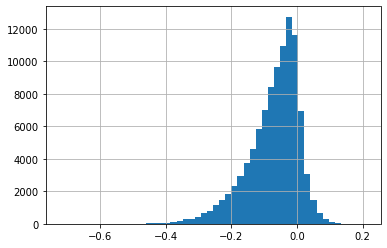

In [156]:
pd.Series(base_scores[1]).hist(bins=50)

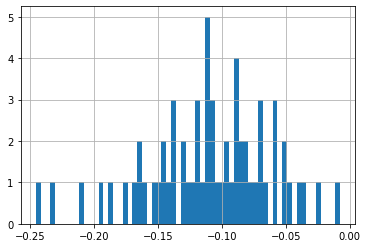

In [157]:
pd.Series(api_scores[1]).hist(bins=len(api_loans))

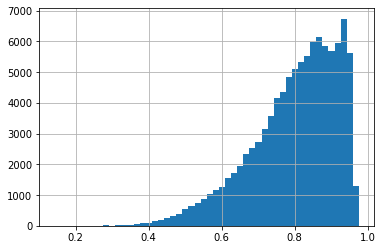

In [158]:
pd.Series(base_scores[2]).hist(bins=50)

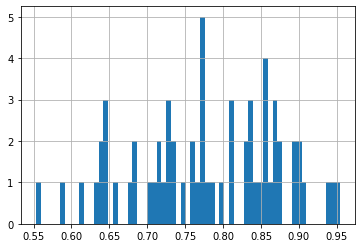

In [159]:
pd.Series(api_scores[2]).hist(bins=len(api_loans))

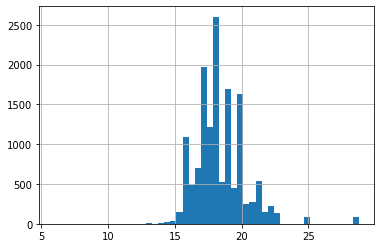

In [164]:
base_loan_info.query('grade == "D"')['int_rate'].hist(bins=50)

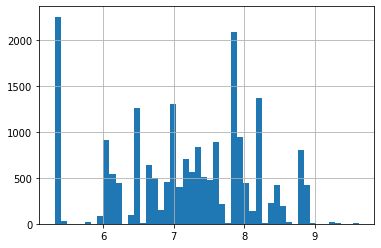

In [165]:
base_loan_info.query('grade == "A"')['int_rate'].hist(bins=50)